## Compute the semantic gender direction

In [1]:
import sys
sys.path.append("..")
sys.path.append("../data")
sys.path.append("../src")
sys.path.append("../data/embeddings")
sys.path.append("../data/sets_palabras")


import directions

import json
import gensim
import re
import regex as re
import pandas as pd
from gensim.models.keyedvectors import KeyedVectors
from gensim.models.keyedvectors import Word2VecKeyedVectors
from gensim import matutils
import random
import sklearn
from sklearn.svm import LinearSVC, SVC
import numpy as np 
from numpy import dot
from tabulate import tabulate
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from prettytable import PrettyTable
from sklearn.metrics import adjusted_rand_score

In [2]:
# Iniciales
biased_model = KeyedVectors.load('../data/embeddings/keyedvectors/model_esp.kv', mmap='r')

In [2]:
FR_biased_model = KeyedVectors.load('../data/embeddings/keyedvectors/model_fr.kv', mmap='r')

## Spanish

#### Compute the gender direction with PCA

In [4]:
with open('../data/sets_palabras/ES/ES_definitional_pairs.json', "r", encoding='utf-8') as f:
    ES_defs = json.load(f)

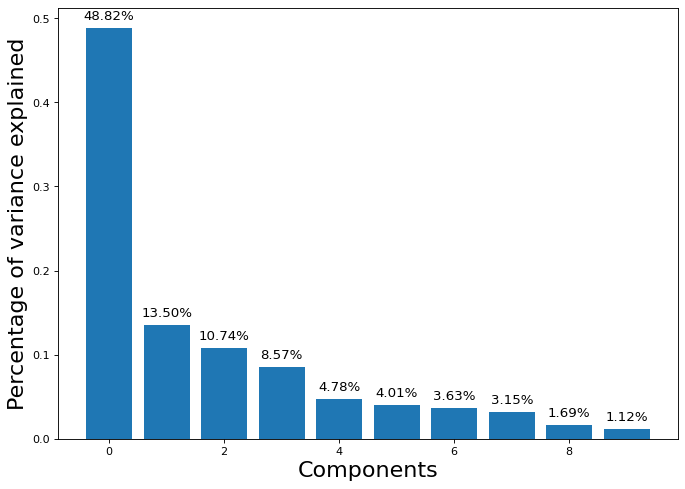

(20, 300)
(300,)
(20, 10)
(20,)


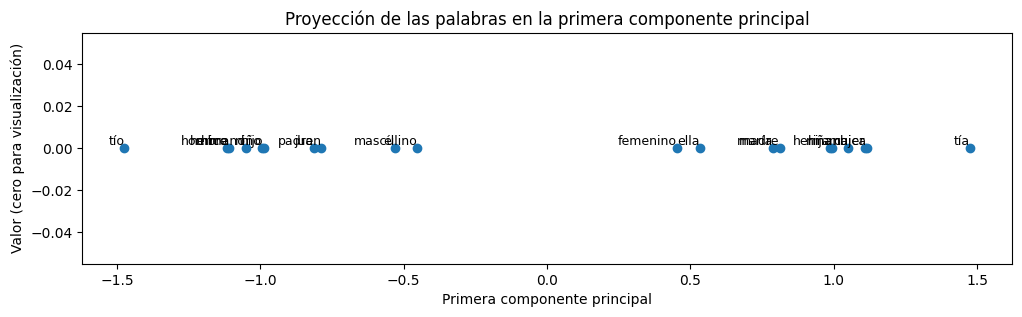

In [5]:
import sys
sys.path.append("../src")
import directions

dPCA = directions.get_gender_direction_PCA(ES_defs, biased_model)

In [6]:
dPCA = - dPCA

In [7]:
np.savetxt("../data/directions/dPCA", dPCA)

#### Compute the semantic gender direction

In [10]:
def get_SG_component(v, dGram):
    """
    Get the semantic gender component (source: Examining Gender Bias ....). The function is modified.

    Parameters:
        v:
        dGram:
        
    Returns:
    """
    # Ensure both vectors are 1D
    v = vector.flatten() if len(v.shape) > 1 else v
    dGram = dGram.flatten() if len(dGram.shape) > 1 else dGram
    
    dGram_square_norm = dGram.dot(dGram) # The dot product of a vector with itself equals the square of its magnitude/length/vector norm
    unit_dGram = dGram/ dGram_square_norm # A vector divided by its norm is a unit vector (only has a direction)
    dot_prod = v.dot(dGram) # The dot product is the similarity between vectors
    dGram_component = dot_prod * unit_dGram # we remove this much (amount) in the dGram direction
    SG_component = v - dGram_component
    
    return SG_component

In [9]:
dPCA = np.loadtxt("../data/directions/dPCA")
dGram = np.loadtxt("../data/directions/dGram")

In [10]:
dSem = get_SG_component(dPCA, dGram)

In [11]:
print(dSem.dot(dGram))

-1.7276761618556513e-16


In [12]:
print(dSem.dot(dPCA))

0.8593970329122139


In [13]:
np.savetxt("../data/directions/dSem", dSem)

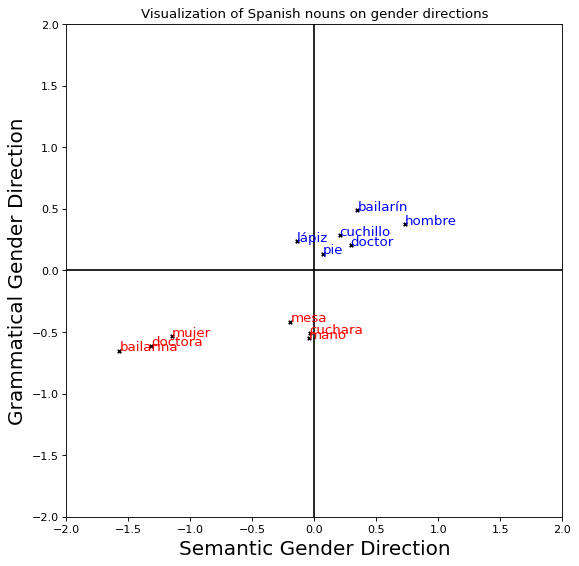

In [14]:
import tests

pairs = [
            ['mujer', 'hombre'], ['doctora', 'doctor'], ['bailarina', 'bailarín'], \
            ['cuchara','cuchillo'],['mesa','lápiz'],['mano','pie']
        ]

tests.plot_on_both_directions(pairs, biased_model, dSem, dGram)

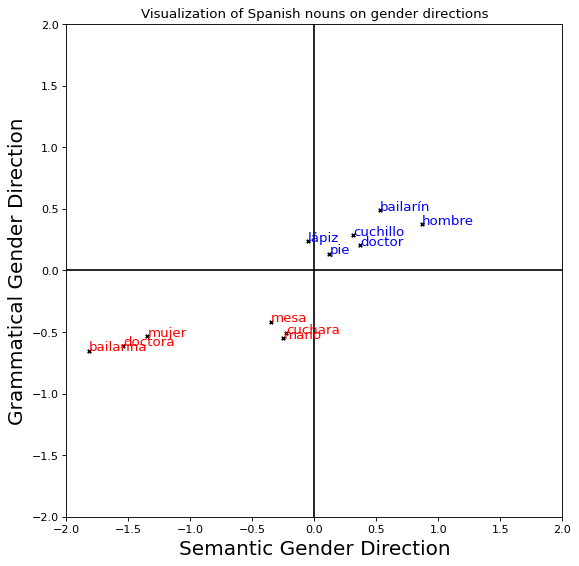

In [15]:
tests.plot_on_both_directions(pairs, biased_model, dPCA, dGram)

## French

In [3]:
with open('../data/sets_palabras/FR/FR_definitional_pairs.json', "r", encoding='utf-8') as f:
    FR_defs = json.load(f)

In [4]:
print(FR_defs)

[['femme', 'homme'], ['femme', 'mari'], ['fille', 'garçon'], ['fille', 'fils'], ['elle', 'il'], ['mère', 'père'], ['femelle', 'mâle'], ['sœur', 'frère'], ['tante', 'oncle'], ['louise', 'gabriel']]


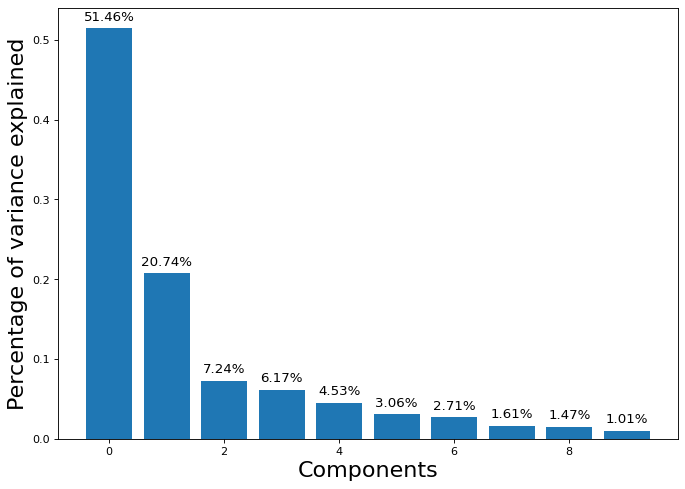

(20, 300)
(300,)
(20, 10)
(20,)


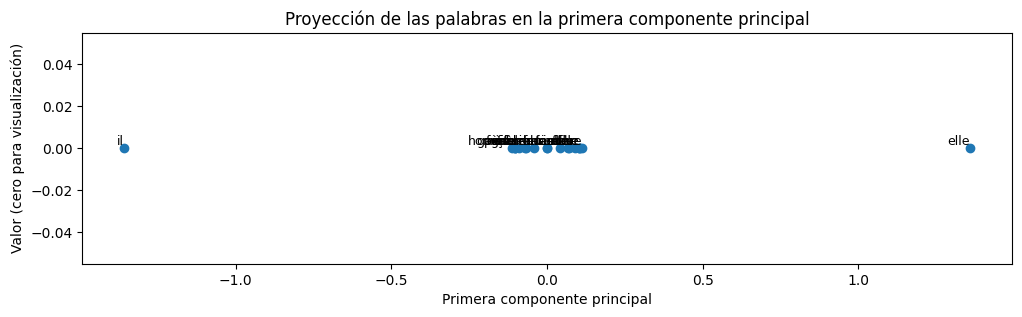

In [5]:
import sys
sys.path.append("../src")
import directions

FR_dPCA = directions.get_gender_direction_PCA(FR_defs, FR_biased_model)

In [ ]:
def get_PC2(pairs, model):
    
    modelo_pca_es, pares_entrada_pca, palabras_entrada_pca = doPCA(pairs, model)

    # Proporción de varianza explicada: 
    # gráfica de barras para ver cuánta información es capaz de capturar cada una de las componentes del modelo

    fig=plt.figure(figsize=(10, 7), dpi=80)
    plt.bar(range(10), modelo_pca_es.explained_variance_ratio_)
    plt.xlabel('Components',fontsize=20)
    plt.ylabel('Percentage of variance explained', fontsize=20)
    plt.margins(tight=True)

    for i, v in enumerate(modelo_pca_es.explained_variance_ratio_):
        plt.text(i, v + 0.01, f"{v:.2%}", ha='center', fontsize=12)

    plt.show()

    pc2 = modelo_pca_es.components_[1]
    
    datos_proyectados_en_pc = modelo_pca_es.transform(pares_entrada_pca)
    
    datos_proyectados_en_pc2 = datos_proyectados_en_pc[:, 1]
    
    plt.figure(figsize=(12, 3))
    plt.scatter(datos_proyectados_en_pc2, np.zeros_like(datos_proyectados_en_pc2), marker='o')
        
    # Añadir etiquetas con las palabras a cada punto
    for i, word in enumerate(palabras_entrada_pca):
        plt.text(datos_proyectados_en_pc2[i], 0, word, fontsize=9, ha='right', va='bottom')
        
    plt.title("Proyección de las palabras en la primera componente principal")
    plt.xlabel("Primera componente principal")
    plt.ylabel("Valor (cero para visualización)")
    plt.show()

    # pc1 será un vector de longitud igual a la dimensión de los datos originales 
    #     (por ejemplo, si cada vector de kv_model tiene 300 dimensiones, entonces pc1 tendrá 300 valores)
    # Cada valor en este vector indica el peso o contribución de la dimensión correspondiente del espacio original a la componente principal
    # Las dimensiones originales que tienen valores más grandes (en valor absoluto) en el vector PC1 
    #     son las que más contribuyen a esa nueva dirección de máxima varianza

    return(pc2)


In [6]:
FR_dPCA = - FR_dPCA

In [7]:
np.savetxt("../data/directions/FR_dPCA", FR_dPCA)

In [8]:
FR_dGram = np.loadtxt("../data/directions/FR_dGram")

In [11]:
FR_dSem = get_SG_component(FR_dPCA, FR_dGram)

In [12]:
np.savetxt("../data/directions/FR_dSem", FR_dSem)

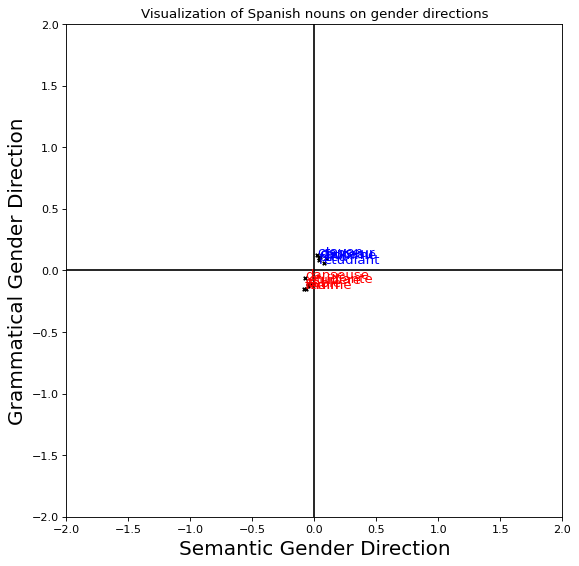

In [13]:
import tests

pairs = [
            ['femme', 'homme'], ['étudiante', 'étudiant'], ['danseuse', 'danseur'], \
            ['cuillère','couteau'],['table','crayon'],['main','pied']
        ]

tests.plot_on_both_directions(pairs, FR_biased_model, FR_dSem, FR_dGram)